In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(ggplot2)
library(cowplot)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


## Doses administered: Reports from provinces and territories

Information on doses administered by dose number and vaccine product is provided by provinces and territories every 4 weeks.

In the last 4 weeks, the majority of doses administered were dose 4 or more.

Data may not be available for some report weeks because:
- data was not submitted for that week (see data availability)
- data quality assurance resulted in negative values
- Data on doses administered should not be used as a substitute for vaccination coverage estimates.
- National data by dose number is incomplete as:
- data on dose 5+ were not available for Nunavut
- data by dose number were not available for Quebec prior to March 13, 2022, and so appears as "Not reported"
- national data excluded doses administered by federal organizations
- Information is subject to change. Numbers may differ in provincial and territorial reports due to the timing of updates and the suppression of values less than 5 for 7 provinces and territories (see limitations).
- Where possible, the number of doses administered includes all doses administered by a province or territory, regardless of where the person receiving the vaccine lives. However, the number of vaccine doses administered may be overestimated due to - -  provincial and territorial partners including doses administered to their residents by other provinces and territories.
- Use caution when comparing data over time. Reporting delays can result in artificial increases in counts while ongoing data quality assurance activities can result in unexpected decreases.

In [2]:
data <- read_csv("abc/vaccination-administration-bydosenumber_grouped.csv")
data<-data|>
rename(numtotal_dose5_admin= 'numtotal_dose5+_admin')


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 9217 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): prename, prfname, vaccine_group, product_name
dbl  (26): pruid, numtotal_totaldoses_admin, numtotal_dose1_admin, numtotal_...
date  (1): week_end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
data_canada<- data|>
filter(product_name=="Total")|>
filter(prename=="Canada")

## The original cleaned data

In [4]:
data2<-data_canada |>
select(- prename, - prfname, - pruid, - product_name)|>
    select(week_end:numtotal_dose5_admin)

In [5]:
ex_data<- data2|>
select(week_end, numtotal_totaldoses_admin)
#ex_data
min(ex_data$week_end)

[1] "2020-12-19"

In [6]:
df2 <- data.frame(date = seq(as.Date("2020-12-19"), as.Date("2023-01-01"), by = "day"))
#df2

In [7]:
newdata<- data2|>
    mutate(days=as.numeric(week_end)-18615)|>
    select(-week_end)

In [8]:
newnewdata <- newdata|>
#mutate(days=days)|>
mutate(total=as.vector(numtotal_totaldoses_admin))|>
mutate(dose1=as.vector(numtotal_dose1_admin))|>
mutate(dose2=as.vector(numtotal_dose2_admin))|>
mutate(dose3=as.vector(numtotal_dose3_admin))|>
mutate(dose4=as.vector(numtotal_dose4_admin))|>
mutate(dose5=as.vector(numtotal_dose5_admin))|>
select(-numtotal_totaldoses_admin,-numtotal_dose5_admin,-numtotal_dose4_admin,-numtotal_dose3_admin,-numtotal_dose2_admin,-numtotal_dose1_admin)
head(newnewdata)

vaccine_group,days,total,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total,0,12362,7634,0,NA,NA,NA
Total,7,46156,28940,0,NA,NA,NA
Total,14,82512,54207,0,NA,NA,NA
Total,21,221866,134067,4521,NA,NA,NA
Total,28,591669,419138,26748,NA,NA,NA
Total,35,834796,556675,59294,NA,NA,NA


Using `newnewdata` to compelete the analysis 

In [9]:
na_row_total<- nrow(newnewdata[is.na(newnewdata$total),])
na_row_total
na_row_1<- nrow(newnewdata[is.na(newnewdata$dose1),])
na_row_1
na_row_2<- nrow(newnewdata[is.na(newnewdata$dose2),])
na_row_2
na_row_3<- nrow(newnewdata[is.na(newnewdata$dose3),])
na_row_3
na_row_4<- nrow(newnewdata[is.na(newnewdata$dose4),])
na_row_4
na_row_5<- nrow(newnewdata[is.na(newnewdata$dose5),])
na_row_5

[1] 0

[1] 0

[1] 0

[1] 16

[1] 16

[1] 16

## dose 1

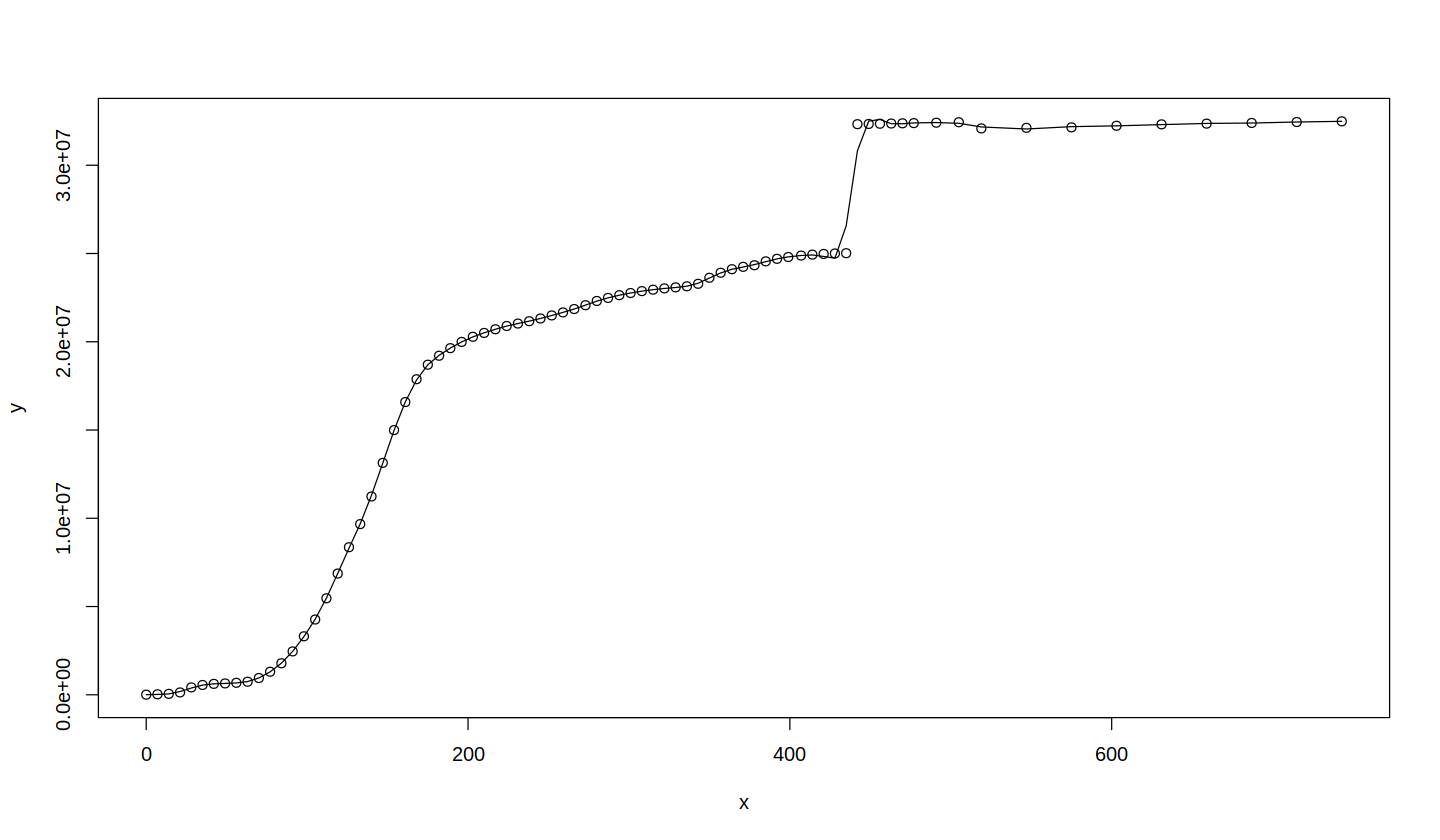

In [45]:
options(repr.plot.width = 12, repr.plot.height = 7)

x<-newnewdata$days
y<-newnewdata$dose1 #plot(y~x,xlim=c(0,1000))

fit<-smooth.spline(x, y,lambda=0.0000001)
#plot1<- plot(ypred~earlyx)
#plot(y~x,xlim=c(0,1000))
plot(y~x)
lines(fit)

#plot(y~x)
bbb <- nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(-300:1000)
ypred<-aaa[3]/(1 + exp((aaa[1] - earlyx)/aaa[2]))

#plot1<- plot(ypred~earlyx)+
#plot(y~x,xlim=c(0,1000))+
#lines(x,predict(bbb))+
#title("dose 1")

#plot1

    df <- data.frame(x = earlyx, y = ypred)
    
df<-df|>mutate(x=earlyx+18615)
df <- df |> mutate(x = as.Date(x, origin = "2020-12-19"))
    # create a ggplot object with the data
    plot_obj <- ggplot(data = df, aes(x = x, y = ypred)) +
      geom_point() +
      labs(x = "Year", y = "Number of doses administered") 

#line_colors <- c("red", "blue", "green", "purple", "orange", "brown", "pink", "gray", "black")

combined_plot <- plot_obj + 
  geom_line(aes(y = ypred*0.0513559350768136), color = "red")+
geom_line(aes(y = ypred*0.0838801563447188), color = "blue")+
geom_line(aes(y = ypred*0.167465894851642), color = "green")+
geom_line(aes(y = ypred*0.151888166814225), color = "purple")+
geom_line(aes(y = ypred*0.138433209904158), color = "orange")+
geom_line(aes(y = ypred*0.144901596547077), color = "brown")+
geom_line(aes(y = ypred*0.142974569047176), color = "pink")+
geom_line(aes(y = ypred*0.0958433550614109), color = "gray")+
geom_line(aes(y = ypred*0.0539745461685849), color = "black")+
ylim(0,5000000)

#plot_obj


#smooth.spline() will do cubic splines ()

#fit2<-smooth.spline(ypred,spar=0.8)+
#lines(fit2,col=“blue”)
#+
#      facet_wrap(~ input$dose, nrow = 1)
#plot_obj <- ggplot(data = df, aes(x = x, y = fit)) +
 #     geom_point() +
  #    labs(x = "Year", y = "Number of doses administered") 
#fit

#combined_plot
#plot_obj

## the graph looks wired 

## dose 2

Warning message:
“Removed 851 rows containing missing values (`geom_point()`).”


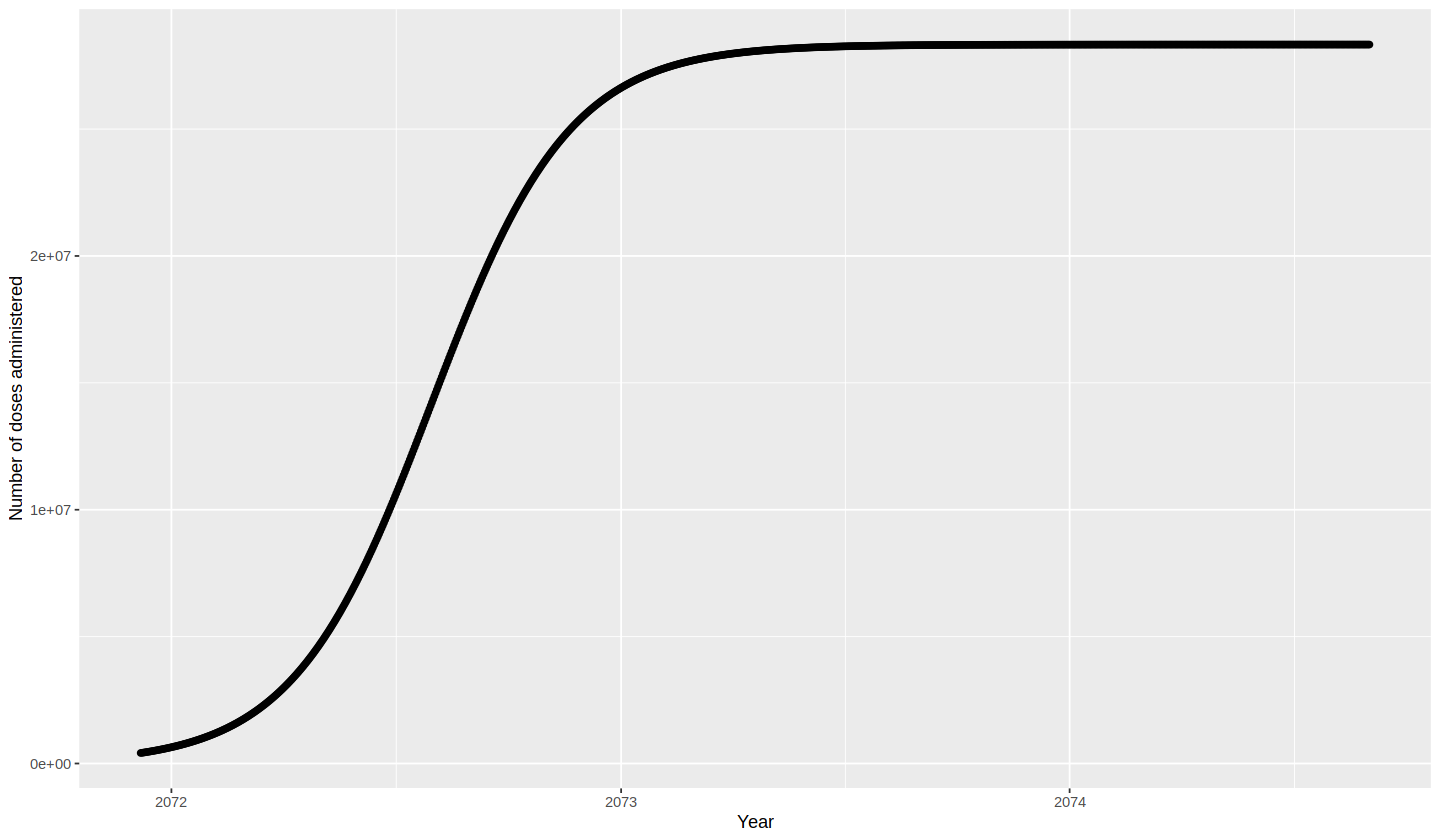

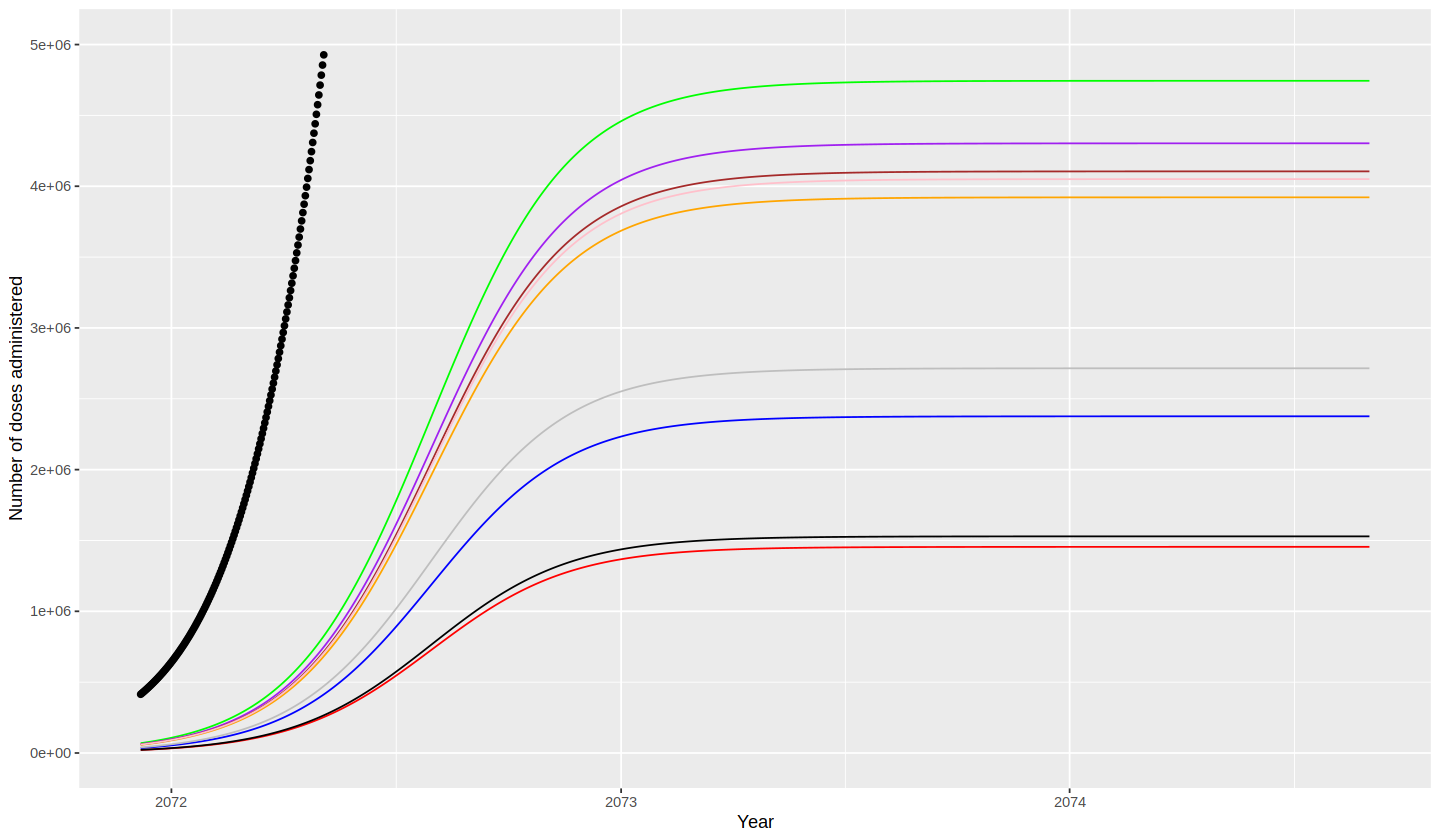

In [24]:
x<-newnewdata$days
y<-newnewdata$dose2
#plot(y~x)

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:1000)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred


    df <- data.frame(x = earlyx, y = ypred)
    
df<-df|>mutate(x=earlyx+18615)
df <- df |> mutate(x = as.Date(x, origin = "2020-12-19"))
    # create a ggplot object with the data
    plot_obj <- ggplot(data = df, aes(x = x, y = ypred)) +
      geom_point() +
      labs(x = "Year", y = "Number of doses administered") #+
#      facet_wrap(~ input$dose, nrow = 1)
plot_obj

combined_plot <- plot_obj + 
  geom_line(aes(y = ypred*0.0513559350768136), color = "red")+
geom_line(aes(y = ypred*0.0838801563447188), color = "blue")+
geom_line(aes(y = ypred*0.167465894851642), color = "green")+
geom_line(aes(y = ypred*0.151888166814225), color = "purple")+
geom_line(aes(y = ypred*0.138433209904158), color = "orange")+
geom_line(aes(y = ypred*0.144901596547077), color = "brown")+
geom_line(aes(y = ypred*0.142974569047176), color = "pink")+
geom_line(aes(y = ypred*0.0958433550614109), color = "gray")+
geom_line(aes(y = ypred*0.0539745461685849), color = "black")+
ylim(0,5000000)

combined_plot
#predict(bbb)

## dose 3

In [31]:
newnewdata3<-newnewdata|>filter(!is.na(dose3))

Warning message:
“Removed 631 rows containing missing values (`geom_point()`).”


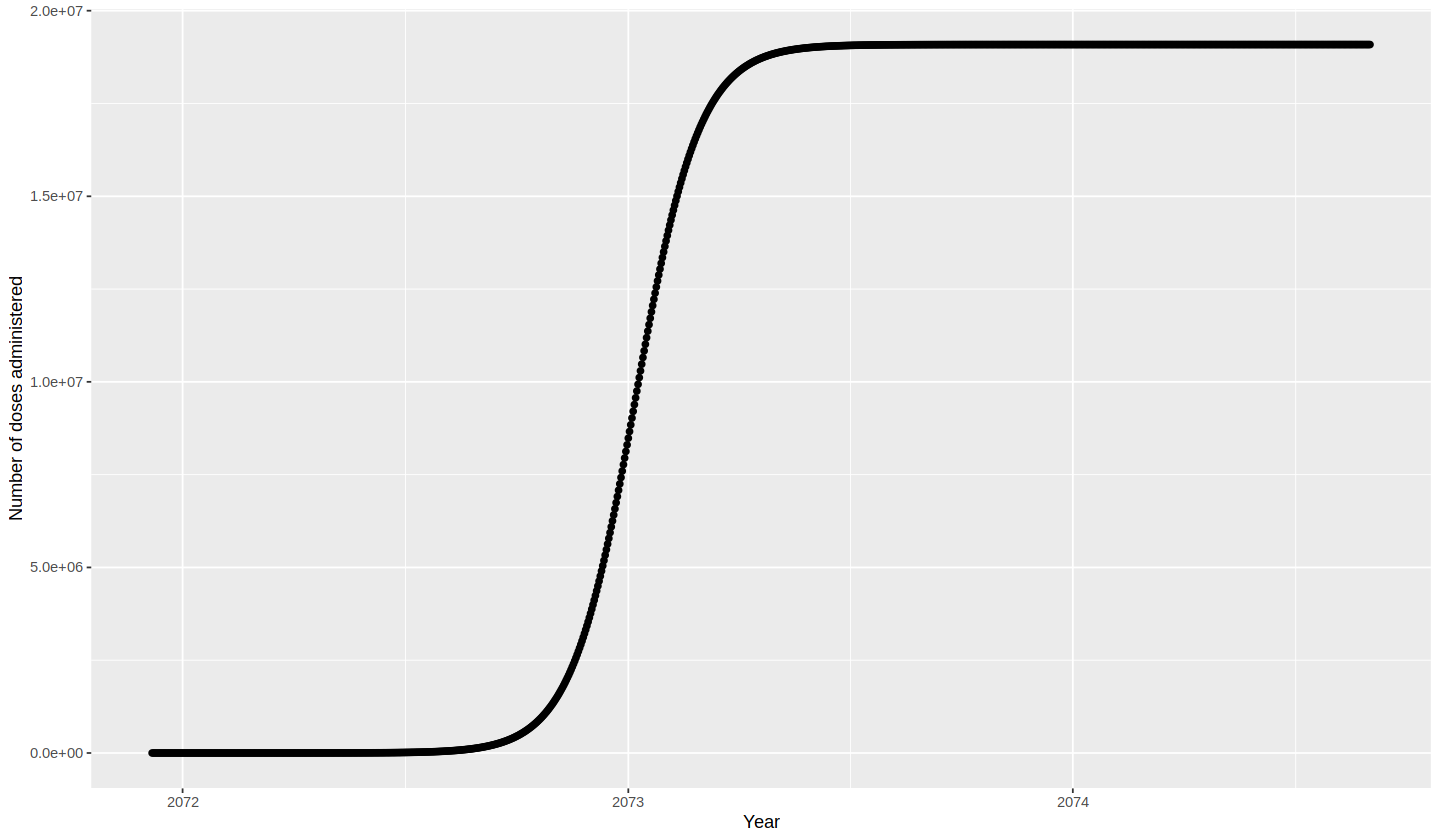

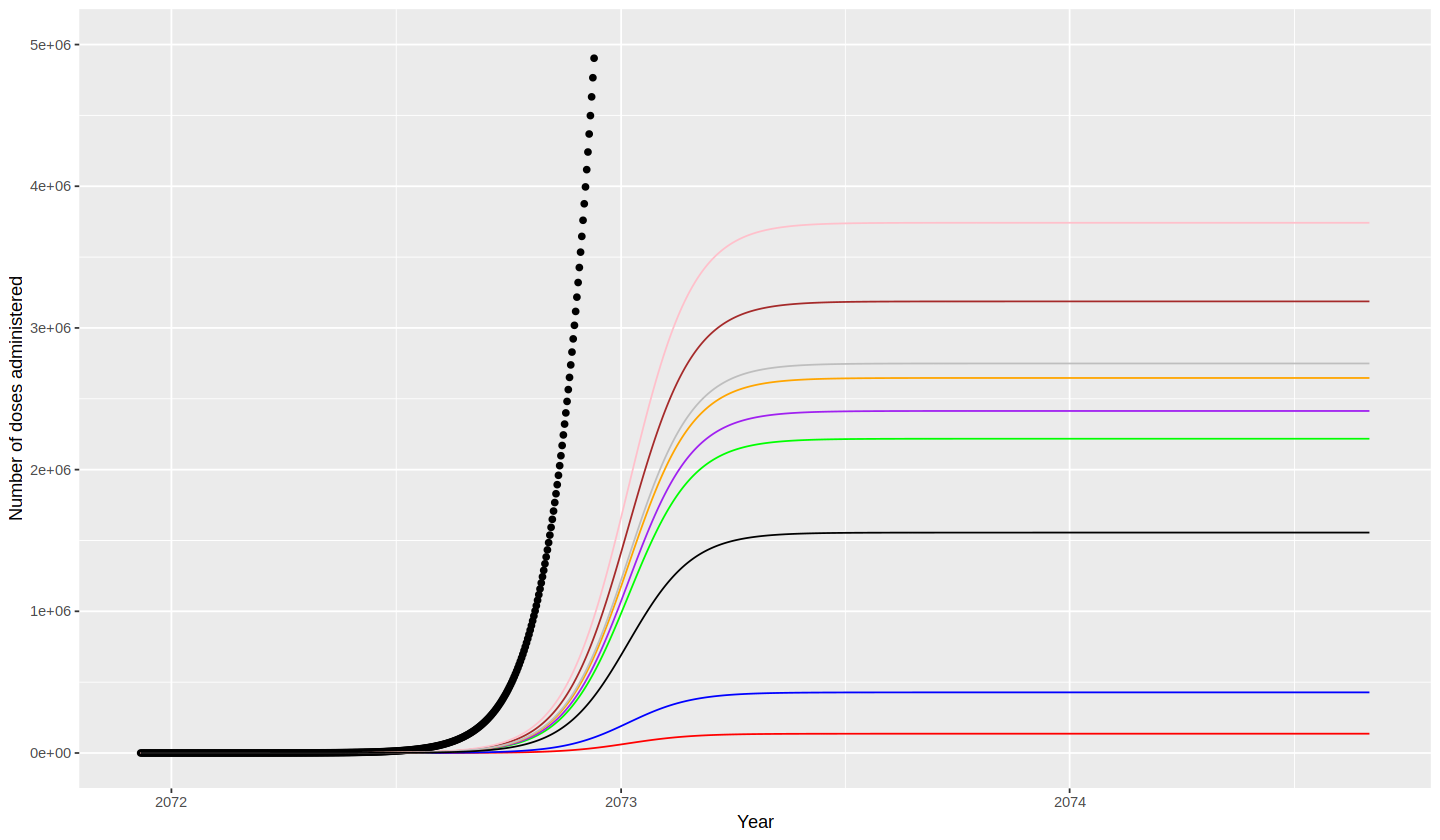

In [32]:
x<-newnewdata3$days
y<-newnewdata3$dose3
#plot(y~x)

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 400, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:1000)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
    df <- data.frame(x = earlyx, y = ypred)
    
df<-df|>mutate(x=earlyx+18615)
df <- df |> mutate(x = as.Date(x, origin = "2020-12-19"))
    # create a ggplot object with the data
    plot_obj <- ggplot(data = df, aes(x = x, y = ypred)) +
      geom_point() +
      labs(x = "Year", y = "Number of doses administered") #+
#      facet_wrap(~ input$dose, nrow = 1)
plot_obj


combined_plot <- plot_obj + 
  geom_line(aes(y = ypred*0.00712858457168496), color = "red")+
geom_line(aes(y = ypred*0.0224119414146467), color = "blue")+
geom_line(aes(y = ypred*0.116198785748977), color = "green")+
geom_line(aes(y = ypred*0.126469244714239), color = "purple")+
geom_line(aes(y = ypred*0.138673987069387), color = "orange")+
geom_line(aes(y = ypred*0.166975215015589), color = "brown")+
geom_line(aes(y = ypred*0.196056579947494), color = "pink")+
geom_line(aes(y = ypred*0.144028519271634), color = "gray")+
geom_line(aes(y = ypred*0.0814939183899938), color = "black")+
ylim(0,5000000)

combined_plot


## dose 4

In [34]:
newnewdata4<-newnewdata|>filter(!is.na(dose4))
#127/7274231
dose4<-c(0.000681584073973007,
46477/7274231,
298738/7274231,
496599 /7274231,
623171/7274231,
1013386/7274231,
1884004/7274231,
1814744/7274231,
1092154/7274231)
dose4

[1] 0.0006815841 0.0063892664 0.0410679837 0.0682682472 0.0856682995
[6] 0.1393117706 0.2589969991 0.2494757178 0.1501401317

Warning message:
“Removed 444 rows containing missing values (`geom_point()`).”


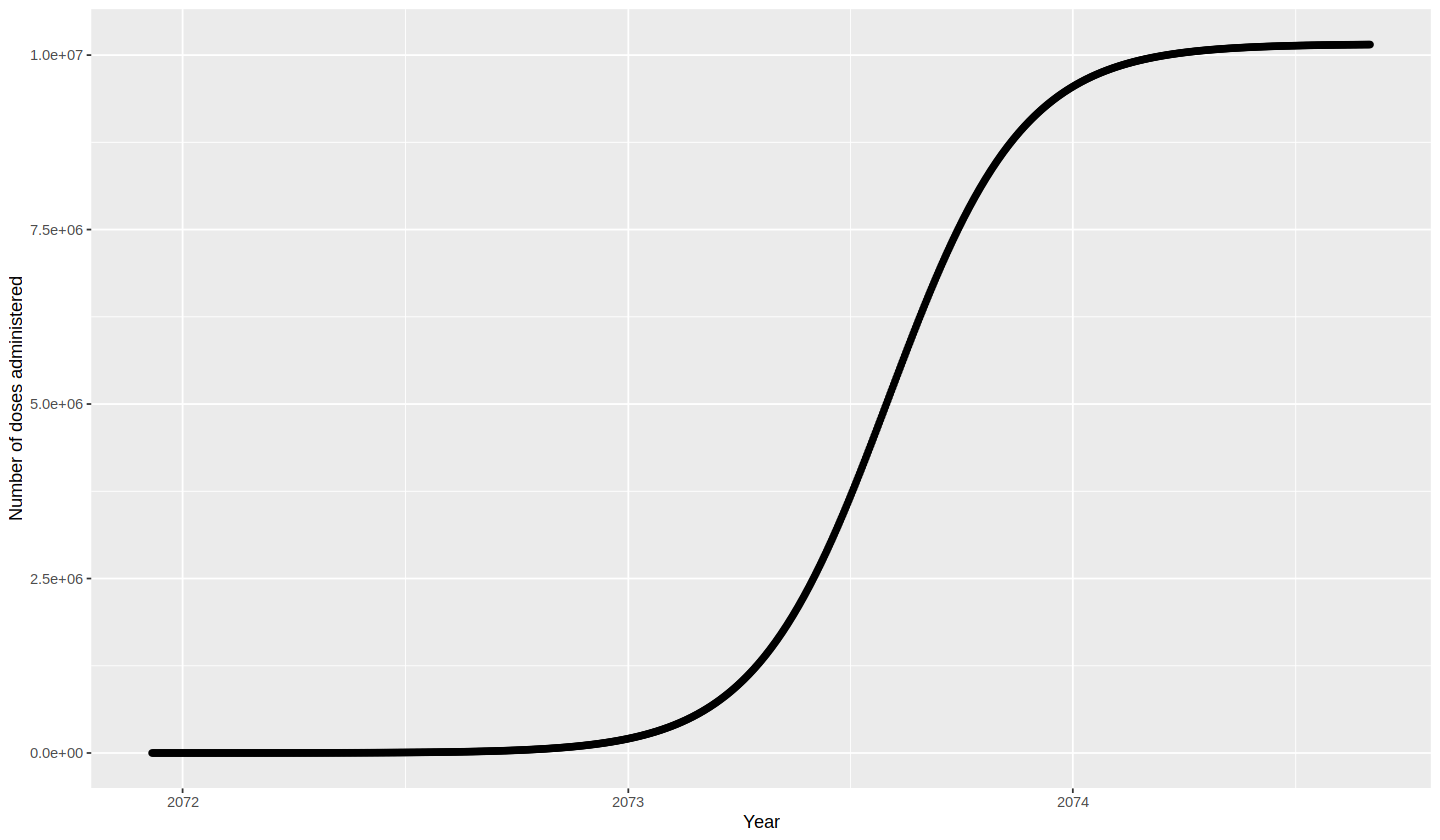

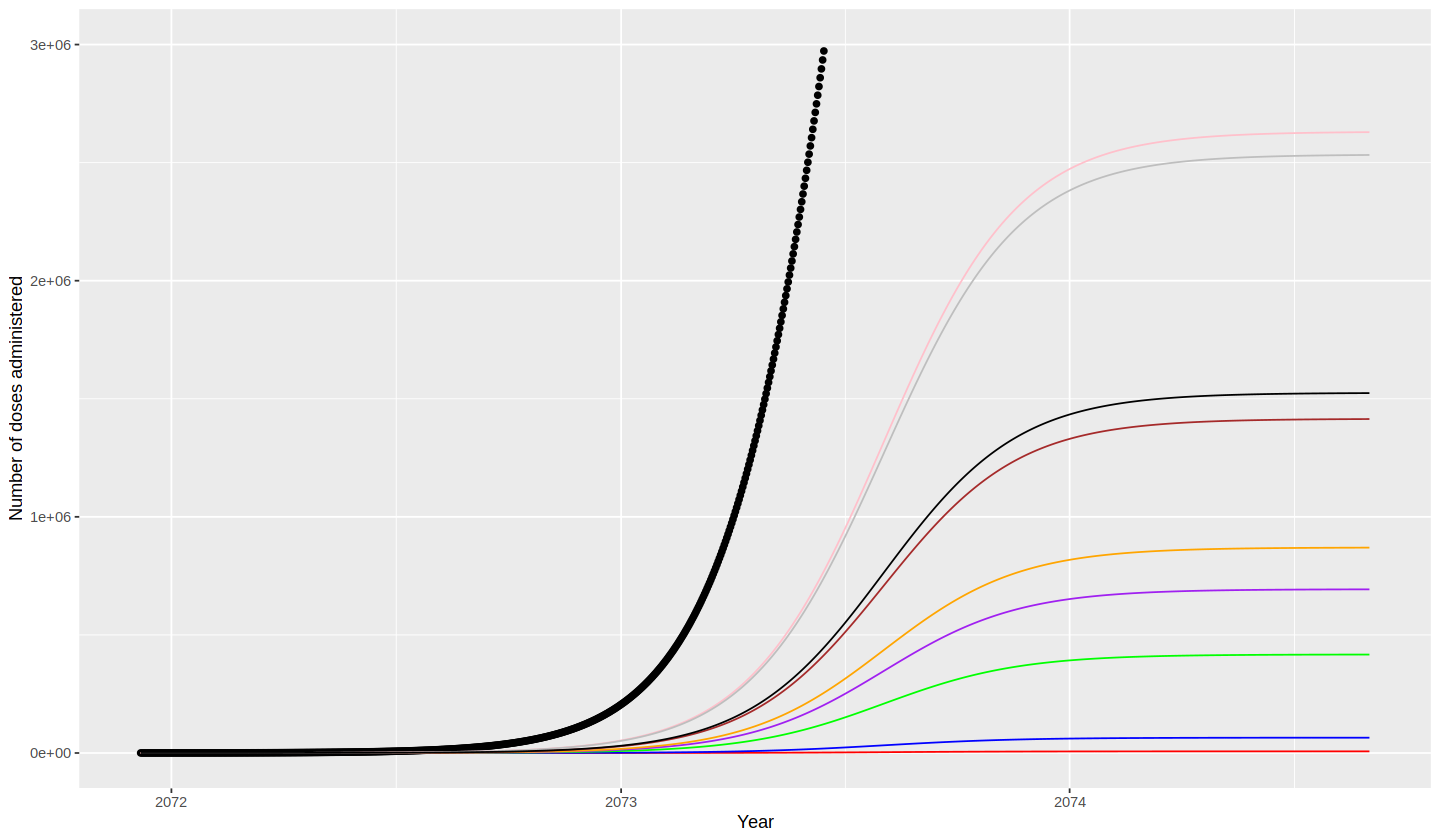

In [41]:
x<-newnewdata4$days
y<-newnewdata4$dose4 
#plot(y~x)

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 600, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:1000)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
    df <- data.frame(x = earlyx, y = ypred)
    
df<-df|>mutate(x=earlyx+18615)
df <- df |> mutate(x = as.Date(x, origin = "2020-12-19"))
    # create a ggplot object with the data
    plot_obj <- ggplot(data = df, aes(x = x, y = ypred)) +
      geom_point() +
      labs(x = "Year", y = "Number of doses administered") #+
#      facet_wrap(~ input$dose, nrow = 1)
plot_obj


combined_plot <- plot_obj + 
  geom_line(aes(y = ypred*0.000681584073973007), color = "red")+
geom_line(aes(y = ypred*0.00638926643929784), color = "blue")+
geom_line(aes(y = ypred*0.0410679836810241), color = "green")+
geom_line(aes(y = ypred*0.0682682471865411), color = "purple")+
geom_line(aes(y = ypred*0.0856682995082229), color = "orange")+
geom_line(aes(y = ypred*0.139311770550042), color = "brown")+
geom_line(aes(y = ypred*0.258996999132967), color = "pink")+
geom_line(aes(y = ypred*0.249475717776903), color = "gray")+
geom_line(aes(y = ypred*0.150140131651029), color = "black")+
ylim(0,3000000)

combined_plot

## dose 5+

In [37]:
newnewdata5<-newnewdata|>filter(!is.na(dose5))
nrow(newnewdata5)
#ggplot(newnewdata5, aes(x=days,y=dose5))+
#geom_point(aes(color=age))

[1] 64

### only 63 days of data for this dose 

Warning message:
“Removed 338 rows containing missing values (`geom_point()`).”


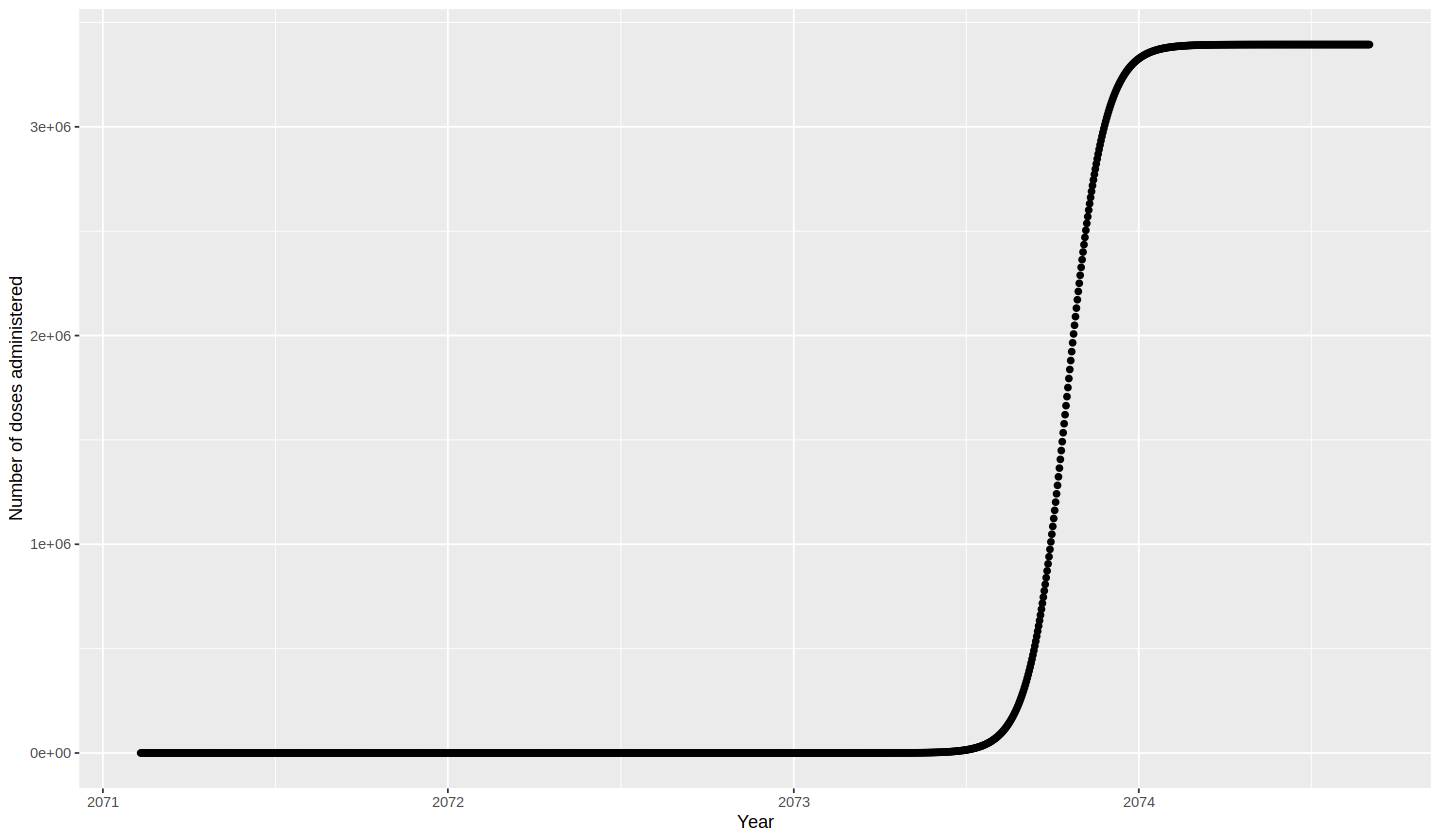

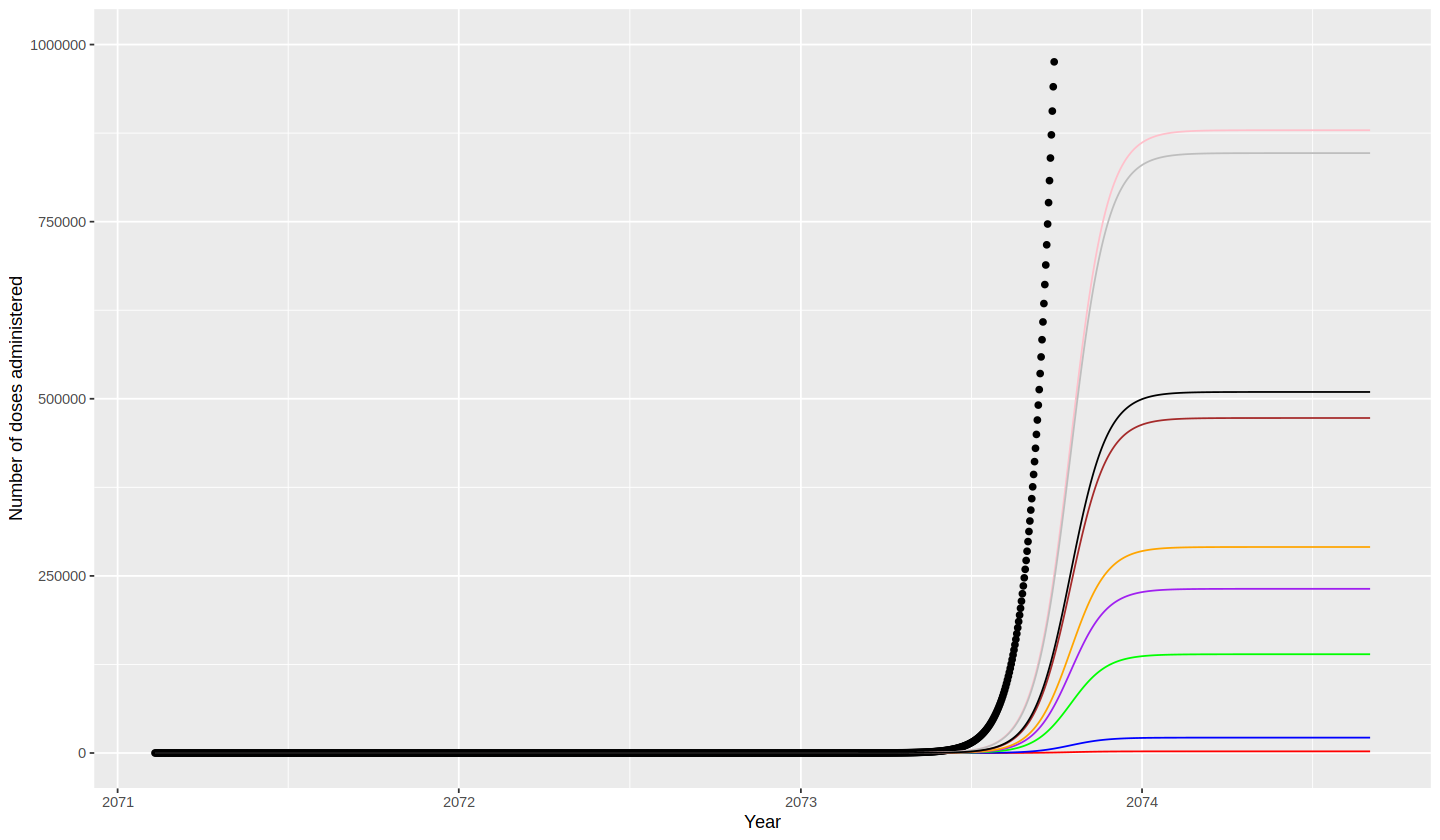

In [40]:
x<-newnewdata5$days
y<-newnewdata5$dose5
#plot(y~x)

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 640, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(-300:1000)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/aaa[2]))
#ypred
    df <- data.frame(x = earlyx, y = ypred)
    





df<-df|>mutate(x=earlyx+18615)
df <- df |> mutate(x = as.Date(x, origin = "2020-12-19"))
    # create a ggplot object with the data
    plot_obj <- ggplot(data = df, aes(x = x, y = ypred)) +
      geom_point() +
      labs(x = "Year", y = "Number of doses administered") #+
#      facet_wrap(~ input$dose, nrow = 1)
plot_obj

combined_plot <- plot_obj + 
  geom_line(aes(y = ypred*0.000681584073973007), color = "red")+
geom_line(aes(y = ypred*0.00638926643929784), color = "blue")+
geom_line(aes(y = ypred*0.0410679836810241), color = "green")+
geom_line(aes(y = ypred*0.0682682471865411), color = "purple")+
geom_line(aes(y = ypred*0.0856682995082229), color = "orange")+
geom_line(aes(y = ypred*0.139311770550042), color = "brown")+
geom_line(aes(y = ypred*0.258996999132967), color = "pink")+
geom_line(aes(y = ypred*0.249475717776903), color = "gray")+
geom_line(aes(y = ypred*0.150140131651029), color = "black")+
ylim(0,1000000)

combined_plot

# the shiny codes 

note: will not be shown in github 

In [47]:
agec<-c("0-10",
       "10-20",
       "20-30",
       "30-40",
       "40-50",
       "50-60",
       "60-70",
       "70-80",
       "80+"
      )
dose2<-c((45376 +1202686)/24302196,  
 2038472/24302196 ,
4069789/24302196 ,
3691216 /24302196 ,
3364231/24302196 ,
3521427 /24302196 ,
3474596 /24302196 ,
2329204/24302196 ,
1311700/24302196 )
dose3<-c((249+138469)/19459403,
436123 /19459403,
2261159/19459403,
2461016/19459403,
2698513/19459403,
3249238/19459403,
3815144/19459403,
2802709/19459403,
1585823/19459403)
dose4<-c(0.000681584073973007,
46477/7274231,
298738/7274231,
496599 /7274231,
623171/7274231,
1013386/7274231,
1884004/7274231,
1814744/7274231,
1092154/7274231)
agepercent <- data.frame(age = agec,
                          dose1 = dose2,
                          dose2 = dose2,
                          dose3 = dose3,
                          dose4 = dose4,
                          dose5 = dose4)
agepercent

age,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-10,0.05135594,0.05135594,0.007128585,0.0006815841,0.0006815841
10-20,0.08388016,0.08388016,0.022411941,0.0063892664,0.0063892664
20-30,0.16746589,0.16746589,0.116198786,0.0410679837,0.0410679837
30-40,0.15188817,0.15188817,0.126469245,0.0682682472,0.0682682472
40-50,0.13843321,0.13843321,0.138673987,0.0856682995,0.0856682995
50-60,0.14490160,0.14490160,0.166975215,0.1393117706,0.1393117706
60-70,0.14297457,0.14297457,0.196056580,0.2589969991,0.2589969991
70-80,0.09584336,0.09584336,0.144028519,0.2494757178,0.2494757178
80+,0.05397455,0.05397455,0.081493918,0.1501401317,0.1501401317
